In [20]:
import sys
from itertools import count
from torch import autograd
from torch_geometric.utils import dense_to_sparse
import copy
from collections import defaultdict
import random
import math

sys.path.append('../../')

from src.models.gcn import *
from src.utils.datasets import *
from src.models.trainable import *
from src.attacks.greedy_gd import *

print(sys.executable)

/home/wcorcoran/anaconda3/envs/mesp/bin/python


In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [22]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [23]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [24]:
model.reset_parameters()
train = Trainable(model)
train.fit(data, 200)

Epoch 0, Train Loss - 5.838493347167969, Val Loss - 5.110721588134766, Val Accuracy - 0.197
Epoch 20, Train Loss - 0.5220639109611511, Val Loss - 1.063498616218567, Val Accuracy - 0.73
Epoch 40, Train Loss - 0.2816891372203827, Val Loss - 1.1218035221099854, Val Accuracy - 0.729
Epoch 60, Train Loss - 0.17838670313358307, Val Loss - 1.3473209142684937, Val Accuracy - 0.728
Epoch 80, Train Loss - 0.16467688977718353, Val Loss - 1.5508580207824707, Val Accuracy - 0.732
Epoch 100, Train Loss - 0.0910603404045105, Val Loss - 1.6316667795181274, Val Accuracy - 0.737
Epoch 120, Train Loss - 0.0912591964006424, Val Loss - 1.624803066253662, Val Accuracy - 0.741
Epoch 140, Train Loss - 0.10259075462818146, Val Loss - 1.8106008768081665, Val Accuracy - 0.726
Epoch 160, Train Loss - 0.09141264110803604, Val Loss - 1.7389836311340332, Val Accuracy - 0.721
Epoch 180, Train Loss - 0.03613922744989395, Val Loss - 1.7466667890548706, Val Accuracy - 0.728
Epoch 200, Train Loss - 0.0409979447722435, Va

In [25]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.739
Initial Loss: 1.8633348941802979


In [ ]:
# run 5 metattacks w/ ptb of 1
amts = defaultdict(int)

for _ in range(10):
    attacker = Metattack(data, device=device)
    attacker.setup_surrogate(model,
                         labeled_nodes=data.train_mask,
                         unlabeled_nodes=data.test_mask, lambda_=0.)
    attacker.reset()
    attacker.attack(0.1)

    for edge in attacker._added_edges.keys():
        amts[edge] += 1

In [8]:
amts

defaultdict(int,
            {(57, 2410): 9,
             (49, 2432): 8,
             (21, 2411): 2,
             (4, 1591): 6,
             (7, 959): 2,
             (115, 2513): 4,
             (23, 1310): 2,
             (13, 500): 2,
             (79, 2571): 5,
             (66, 2417): 6,
             (76, 225): 2,
             (50, 2258): 2,
             (79, 1938): 2,
             (86, 2527): 3,
             (115, 1024): 7,
             (115, 986): 1,
             (29, 1793): 2,
             (19, 2593): 4,
             (38, 1648): 1,
             (82, 2299): 1,
             (37, 2255): 1,
             (115, 2551): 5,
             (86, 96): 1,
             (54, 1084): 2,
             (131, 2098): 2,
             (120, 462): 3,
             (58, 832): 3,
             (63, 2297): 5,
             (4, 2605): 3,
             (11, 2341): 1,
             (115, 545): 5,
             (130, 1048): 1,
             (60, 2533): 1,
             (32, 2396): 7,
             (54, 2699): 2,
       

In [9]:
sorted_list = sorted(amts.items(), key=lambda item: item[1], reverse=True)
sorted_keys = [key for key, value in sorted_list]

In [10]:
sorted_list

[((32, 1372), 10),
 ((32, 491), 10),
 ((57, 2410), 9),
 ((32, 2608), 9),
 ((32, 2164), 9),
 ((49, 2432), 8),
 ((32, 499), 8),
 ((32, 2604), 8),
 ((32, 2158), 8),
 ((54, 2588), 8),
 ((23, 2255), 8),
 ((115, 1024), 7),
 ((32, 2396), 7),
 ((57, 2104), 7),
 ((58, 1643), 7),
 ((58, 1418), 7),
 ((58, 198), 7),
 ((23, 625), 7),
 ((58, 2549), 7),
 ((58, 1422), 7),
 ((32, 2316), 7),
 ((32, 2649), 7),
 ((32, 2454), 7),
 ((32, 1236), 7),
 ((23, 2612), 7),
 ((23, 2142), 7),
 ((58, 2505), 7),
 ((23, 2697), 7),
 ((4, 1591), 6),
 ((66, 2417), 6),
 ((4, 313), 6),
 ((58, 1454), 6),
 ((58, 956), 6),
 ((54, 1223), 6),
 ((54, 1686), 6),
 ((61, 295), 6),
 ((23, 322), 6),
 ((58, 2672), 6),
 ((60, 890), 6),
 ((23, 2429), 6),
 ((23, 2477), 6),
 ((23, 2559), 6),
 ((116, 2692), 6),
 ((79, 2571), 5),
 ((115, 2551), 5),
 ((63, 2297), 5),
 ((115, 545), 5),
 ((27, 2541), 5),
 ((32, 106), 5),
 ((31, 32), 5),
 ((23, 1132), 5),
 ((62, 988), 5),
 ((60, 630), 5),
 ((136, 2635), 5),
 ((54, 2624), 5),
 ((54, 1364), 5),
 (

In [11]:
edges_to_add = sorted_keys

In [12]:
edges_to_add

[(32, 1372),
 (32, 491),
 (57, 2410),
 (32, 2608),
 (32, 2164),
 (49, 2432),
 (32, 499),
 (32, 2604),
 (32, 2158),
 (54, 2588),
 (23, 2255),
 (115, 1024),
 (32, 2396),
 (57, 2104),
 (58, 1643),
 (58, 1418),
 (58, 198),
 (23, 625),
 (58, 2549),
 (58, 1422),
 (32, 2316),
 (32, 2649),
 (32, 2454),
 (32, 1236),
 (23, 2612),
 (23, 2142),
 (58, 2505),
 (23, 2697),
 (4, 1591),
 (66, 2417),
 (4, 313),
 (58, 1454),
 (58, 956),
 (54, 1223),
 (54, 1686),
 (61, 295),
 (23, 322),
 (58, 2672),
 (60, 890),
 (23, 2429),
 (23, 2477),
 (23, 2559),
 (116, 2692),
 (79, 2571),
 (115, 2551),
 (63, 2297),
 (115, 545),
 (27, 2541),
 (32, 106),
 (31, 32),
 (23, 1132),
 (62, 988),
 (60, 630),
 (136, 2635),
 (54, 2624),
 (54, 1364),
 (54, 804),
 (54, 1019),
 (58, 1559),
 (58, 585),
 (358, 2618),
 (54, 926),
 (54, 2032),
 (14, 601),
 (54, 293),
 (58, 2578),
 (60, 1982),
 (29, 1387),
 (86, 1084),
 (54, 1860),
 (32, 1836),
 (32, 1501),
 (54, 697),
 (94, 508),
 (7, 2411),
 (21, 2593),
 (29, 2374),
 (10, 2193),
 (32,

In [26]:
edges_to_add = None

In [27]:
model_save_path = "multi_metattack_gcn_model.pth"
list_save_path = "multi_metattack_edges_list.pth"

In [8]:
# # save model
# torch.save(model.state_dict(), model_save_path)

# # save edges
# torch.save(edges_to_add, list_save_path)

NameError: name 'edges_to_add' is not defined

In [28]:
loaded_model_state_dict = torch.load(model_save_path)

model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)
model.load_state_dict(loaded_model_state_dict)

# Load the saved list
edges_to_add = torch.load(list_save_path)

In [31]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.739
Initial Loss: 1.8633348941802979


In [32]:
from torch_geometric.utils import dense_to_sparse, to_networkx, from_networkx
import networkx as nx

In [33]:
G = to_networkx(data, to_undirected=True)
initial_edge_count = G.number_of_edges() // 2
ptb_rate = 0.15
budget = int(ptb_rate * initial_edge_count)

In [34]:
print(len(edges_to_add))
print(budget)

3633
395


In [35]:
def gen_weights(size):
    lst = []
    for i in range(1, size + 1):
        lst.append(1 / (10 * math.log2(i + 1)))
    return lst

In [36]:
def constant_fn(delta, initial_loss, i, first_phase_edges):
    return abs(delta) < (initial_loss / 100)

def increasing_fn(delta, initial_loss, i, first_phase_edges):
    print(abs(delta), ((i * initial_loss) / (first_phase_edges * 100)), abs(delta) < ((i * initial_loss) / (first_phase_edges * 100)))
    return abs(delta) < (((i + 1) * initial_loss) / (first_phase_edges * 100))

In [37]:
def binary_fn(rand, i):
    return rand < 0.5

def decreasing_fn(rand, i):
    return rand < math.exp(-math.log(i + 1))

In [38]:
def two_phase_attack_mcmc(split, rand_fn, accept_fn, seed=42):
    random.seed(seed)
    dirty_data_copy = copy.copy(data)
    diff_threshold = abs(initial_loss/200)
    first_phase_edges = int(budget * split)
    second_phase_percent = ptb_rate * (1 - split) * 1/2
    print(2 * second_phase_percent)
    accuracies = []
    G = to_networkx(data, to_undirected=True)
    G_dirty = to_networkx(data, to_undirected=True)

    # run a metattack on 1 - split
    # store those edges in a dirty matrix
    # calculate loss + accuracy of dirty matrix
    
    dirty_data = from_networkx(G_dirty).to(device)
    dirty_data.x = dirty_data_copy.x 
    dirty_data.y = dirty_data_copy.y 
    dirty_data.train_mask = dirty_data_copy.train_mask
    dirty_data.test_mask = dirty_data_copy.test_mask
    
    attacker_dirty = Metattack(dirty_data, device=device)
    attacker_dirty.setup_surrogate(model,
                             labeled_nodes=dirty_data_copy.train_mask,
                             unlabeled_nodes=dirty_data_copy.test_mask, lambda_=0.)
    attacker_dirty.reset()
    attacker_dirty.attack(second_phase_percent)

    degs_dirty = defaultdict(tuple)
    
    for k, v in attacker_dirty._added_edges.items():
        degs_dirty[v] = (k, True)
        
    for k, v in attacker_dirty._removed_edges.items():
        degs_dirty[v] = (k, False)

    for _, second in degs_dirty.items():
        u, v = second[0]
        if second[1]:
            G_dirty.add_edge(u, v)
        else:
            G_dirty.remove_edge(u, v)
    
    dirty_data = from_networkx(G_dirty).to(device)
    dirty_data.x = dirty_data_copy.x 
    dirty_data.y = dirty_data_copy.y 
    dirty_data.train_mask = dirty_data_copy.train_mask
    dirty_data.test_mask = dirty_data_copy.test_mask

    initial_dirty_loss, initial_dirty_accuracy = train.test(dirty_data)

    degs_set = set([v[0] for v in degs_dirty.values()])
    
    # remove dirty edges from edges_to_ad
    data_copy = copy.copy(data)
    i, j = 0, 0 # i - number added, j - attempts
    dirty_prev_loss, prev_loss = initial_dirty_loss, initial_loss
    weights = gen_weights(len(edges_to_add))
    while i < first_phase_edges:
        print(f"Attempt: {j}, Selected: {i}")
        j += 1
        u, v = random.choices(edges_to_add, weights=weights, k=1)[0]
        # u, v = random.choices(edges_to_add, k=1)[0]
        if (u, v) in degs_set:
            continue
            
        hasEdge = G.has_edge(u, v)
        # u, v = edges_to_add[j]

        # clean matrix
        if hasEdge:
            G.remove_edge(u, v)
        else:
            G.add_edge(u, v)

        modified_data = from_networkx(G).to(device)
        modified_data.x = data.x 
        modified_data.y = data.y 
        modified_data.train_mask = data.train_mask
        modified_data.test_mask = data.test_mask
    
        modified_loss, modified_accuracy = train.test(modified_data)
        delta = modified_loss - initial_loss

        # dirty matrix
        if hasEdge:
            G_dirty.remove_edge(u, v)
        else:
            G_dirty.add_edge(u, v)

        dirty_data = from_networkx(G_dirty).to(device)
        dirty_data.x = dirty_data_copy.x 
        dirty_data.y = dirty_data_copy.y 
        dirty_data.train_mask = dirty_data_copy.train_mask
        dirty_data.test_mask = dirty_data_copy.test_mask
    
        dirty_loss, dirty_accuracy = train.test(dirty_data)
        dirty_delta = dirty_loss - dirty_prev_loss
        master_dirty = dirty_loss - initial_dirty_loss

        # if abs(delta) > 1/200 loss, immediately continue
        print(f"max_change: {initial_loss / 100}, master_clean_delta: {delta}, master_dirty_delta: {master_dirty}")
        # modified_loss: {modified_loss}, initial_loss: {initial_loss}, dirty_delta: {dirty_delta}")
        # consider something sublinear here
        if accept_fn(delta, initial_loss, i, first_phase_edges) and dirty_delta > 0:
            print("works, adding")
            i += 1
            dirty_prev_loss = dirty_loss
            accuracies.append(modified_loss)
        elif not accept_fn(delta, initial_loss, i, first_phase_edges) or master_dirty < delta or master_dirty < 0:
            if hasEdge:
                G.add_edge(u, v)
                G_dirty.add_edge(u, v)
            else:
                G.remove_edge(u, v)
                G_dirty.remove_edge(u, v)
            continue
        else:
            rnd = random.random()
            if rand_fn(rnd, i):
                print("selected prob ltf")
                i += 1
                dirty_prev_loss = dirty_loss
                accuracies.append(modified_loss)
            else:
                print("removing edge")
                if hasEdge:
                    G.add_edge(u, v)
                    G_dirty.add_edge(u, v)
                else:
                    G.remove_edge(u, v)
                    G_dirty.remove_edge(u, v)
    
    modified_data = from_networkx(G).to(device)
    modified_data.x = data.x 
    modified_data.y = data.y 
    modified_data.train_mask = data.train_mask
    modified_data.test_mask = data.test_mask
    
    attacker = Metattack(modified_data, device=device)
    attacker.setup_surrogate(model,
                             labeled_nodes=data.train_mask,
                             unlabeled_nodes=data.test_mask, lambda_=0.)
    attacker.reset()
    attacker.attack(second_phase_percent)

    degs = defaultdict(tuple)
    
    for k, v in attacker._added_edges.items():
        degs[v] = (k, True)
        
    for k, v in attacker._removed_edges.items():
        degs[v] = (k, False)
    
    for _, second in degs.items():
        u, v = second[0]
        if second[1]:
            G.add_edge(u, v)
        else:
            G.remove_edge(u, v)
    
        modified_data = from_networkx(G).to(device)
        modified_data.x = data.x 
        modified_data.y = data.y 
        modified_data.train_mask = data.train_mask
        modified_data.test_mask = data.test_mask
    
        modified_loss, modified_accuracy = train.test(modified_data)
    
        # accuracies.append(modified_accuracy)
        accuracies.append(modified_loss)

    print(accuracies)
    return accuracies

In [39]:
splits = [0, 0.5, 0.7, 0.9]
# splits = [0.5, 0.7, 0.9]
split_dic = defaultdict(list)

In [40]:
for s in splits:
    print(s)
    split_dic[s] = two_phase_attack_mcmc(s, binary_fn, constant_fn)

0
0.15


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

[1.8600938320159912, 1.8579766750335693, 1.8584848642349243, 1.8578627109527588, 1.8548017740249634, 1.854801893234253, 1.852010726928711, 1.8530161380767822, 1.8531988859176636, 1.8531659841537476, 1.8526943922042847, 1.8519716262817383, 1.8524376153945923, 1.8546504974365234, 1.8541650772094727, 1.8541651964187622, 1.8539687395095825, 1.8539444208145142, 1.8517482280731201, 1.851470708847046, 1.8560729026794434, 1.8566241264343262, 1.8607014417648315, 1.862882375717163, 1.8609331846237183, 1.8621442317962646, 1.862218976020813, 1.862074613571167, 1.862074613571167, 1.862074613571167, 1.862038493156433, 1.8618561029434204, 1.8605636358261108, 1.8597426414489746, 1.8562225103378296, 1.8562192916870117, 1.8562219142913818, 1.8568636178970337, 1.8574471473693848, 1.861369252204895, 1.8608393669128418, 1.8686659336090088, 1.8680951595306396, 1.8681042194366455, 1.867618441581726, 1.8688840866088867, 1.8689312934875488, 1.8689311742782593, 1.8708349466323853, 1.8692660331726074, 1.86769711

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 0.0, master_dirty_delta: 0.00013887882232666016
works, adding
Attempt: 1, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0028041601181030273, master_dirty_delta: -0.0026837587356567383
Attempt: 2, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 9.655952453613281e-05
selected prob ltf
Attempt: 3, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -5.340576171875e-05, master_dirty_delta: -1.5616416931152344e-05
Attempt: 4, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: 3.5762786865234375e-07, master_dirty_delta: -0.00023126602172851562
Attempt: 5, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: 9.417533874511719e-06, master_dirty_delta: 7.271766662597656e-05
selected prob ltf
Attempt: 6, Selected: 3
max_change: 0.018633348941802977, master_clean_delta: -7.462501525878906e-05, m

Peturbing graph...:   0%|          | 0/204 [00:00<?, ?it/s]

[1.8633348941802979, 1.8633350133895874, 1.8633443117141724, 1.863260269165039, 1.863260269165039, 1.8632700443267822, 1.8632699251174927, 1.8648416996002197, 1.8690239191055298, 1.8690241575241089, 1.8713544607162476, 1.8724300861358643, 1.8730541467666626, 1.8730547428131104, 1.8731284141540527, 1.8732093572616577, 1.873595118522644, 1.8778272867202759, 1.8778637647628784, 1.8778645992279053, 1.8778654336929321, 1.8778653144836426, 1.8778654336929321, 1.8778655529022217, 1.8807681798934937, 1.8807682991027832, 1.8805480003356934, 1.8805480003356934, 1.8800772428512573, 1.8798922300338745, 1.8800649642944336, 1.8813995122909546, 1.881412148475647, 1.8814727067947388, 1.881473183631897, 1.881473183631897, 1.881473183631897, 1.8818159103393555, 1.8818159103393555, 1.8784308433532715, 1.8784308433532715, 1.8784308433532715, 1.8784308433532715, 1.878442406654358, 1.8784366846084595, 1.8785074949264526, 1.8789781332015991, 1.8794028759002686, 1.8781336545944214, 1.8785146474838257, 1.87852

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013899803161621094
works, adding
Attempt: 1, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0028040409088134766, master_dirty_delta: -0.0021246671676635742
Attempt: 2, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013577938079833984
selected prob ltf
Attempt: 3, Selected: 2
Attempt: 4, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: 3.5762786865234375e-07, master_dirty_delta: 0.0004520416259765625
works, adding
Attempt: 5, Selected: 3
max_change: 0.018633348941802977, master_clean_delta: 1.0013580322265625e-05, master_dirty_delta: 0.0012050867080688477
works, adding
Attempt: 6, Selected: 4
max_change: 0.018633348941802977, master_clean_delta: 1.0013580322265625e-05, master_dirty_delta: 0.0012036561965942383
selected prob ltf
Attempt: 7, Selected: 5
max_cha

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

[1.8633350133895874, 1.8633350133895874, 1.8633352518081665, 1.8633449077606201, 1.8633449077606201, 1.863344669342041, 1.863344669342041, 1.863344669342041, 1.8649163246154785, 1.8690987825393677, 1.8691046237945557, 1.8714351654052734, 1.8725106716156006, 1.872029185295105, 1.8720299005508423, 1.8716583251953125, 1.8718777894973755, 1.8761100769042969, 1.8761104345321655, 1.8761111497879028, 1.8761112689971924, 1.8748022317886353, 1.8748024702072144, 1.8748022317886353, 1.8748022317886353, 1.8748085498809814, 1.8745883703231812, 1.8766909837722778, 1.8765058517456055, 1.8766788244247437, 1.8780134916305542, 1.8785196542739868, 1.8782809972763062, 1.881476640701294, 1.88152277469635, 1.88152277469635, 1.8815233707427979, 1.8815233707427979, 1.88152277469635, 1.88152277469635, 1.88152277469635, 1.8817389011383057, 1.878322720527649, 1.878322720527649, 1.8780629634857178, 1.8781193494796753, 1.8781193494796753, 1.8781049251556396, 1.8757851123809814, 1.8757641315460205, 1.87577033042907

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013899803161621094
works, adding
Attempt: 1, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0028040409088134766, master_dirty_delta: -0.002672910690307617
Attempt: 2, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013911724090576172
works, adding
Attempt: 3, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -0.0014560222625732422, master_dirty_delta: -0.0013169050216674805
Attempt: 4, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -5.328655242919922e-05, master_dirty_delta: 8.52346420288086e-05
removing edge
Attempt: 5, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: 9.298324584960938e-06, master_dirty_delta: 0.00014841556549072266
works, adding
Attempt: 6, Selected: 3
max_change: 0.018633348941802977, master_clean_delta: 

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

[1.8633350133895874, 1.8633350133895874, 1.8633441925048828, 1.8633443117141724, 1.8633441925048828, 1.863373041152954, 1.8633828163146973, 1.8633825778961182, 1.8633825778961182, 1.8675649166107178, 1.8675706386566162, 1.8686461448669434, 1.8681650161743164, 1.868165373802185, 1.868294358253479, 1.8683754205703735, 1.868594765663147, 1.8728270530700684, 1.8728331327438354, 1.8734544515609741, 1.8734549283981323, 1.8734556436538696, 1.8734554052352905, 1.8733206987380981, 1.8733208179473877, 1.8733205795288086, 1.8733271360397339, 1.8733271360397339, 1.8731067180633545, 1.8731064796447754, 1.8731120824813843, 1.8752148151397705, 1.8750299215316772, 1.8754585981369019, 1.876793384552002, 1.8772995471954346, 1.877312183380127, 1.8805079460144043, 1.8805540800094604, 1.8805540800094604, 1.8805545568466187, 1.8805545568466187, 1.8805540800094604, 1.8808828592300415, 1.8808828592300415, 1.8808828592300415, 1.8808828592300415, 1.8808834552764893, 1.8808835744857788, 1.880623698234558, 1.8811

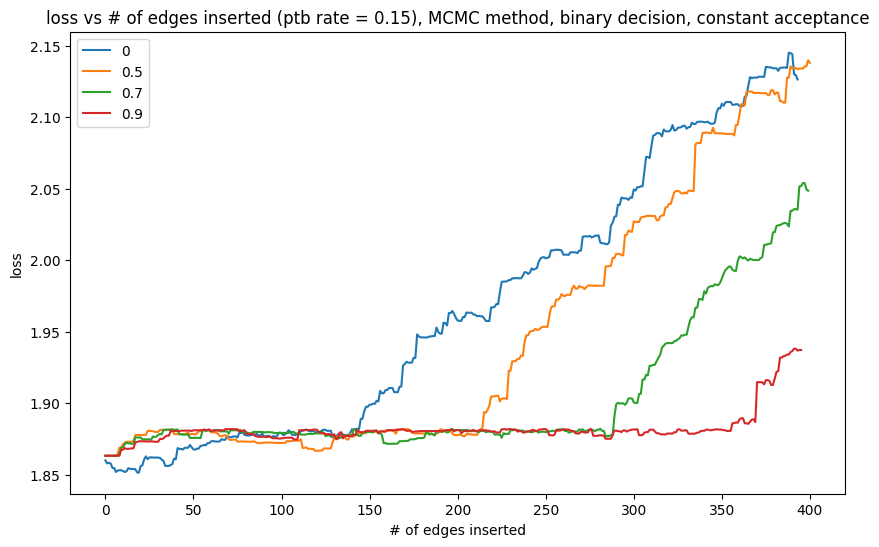

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Iterate over the dictionary and plot each list
for label, values in split_dic.items():
    plt.plot(values, label=str(label))

plt.xlabel('# of edges inserted')
plt.ylabel('loss')
plt.title('loss vs # of edges inserted (ptb rate = 0.15), MCMC method, binary decision, constant acceptance')
plt.legend()

plt.show()

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [42]:
splits = [0, 0.5, 0.7, 0.9]
# splits = [0.5, 0.7, 0.9]
split_dic_decreasing = defaultdict(list)

In [43]:
for s in splits:
    print(s)
    split_dic_decreasing[s] = two_phase_attack_mcmc(s, binary_fn, increasing_fn)

0
0.15


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

[1.8597924709320068, 1.8603005409240723, 1.8581833839416504, 1.8554596900939941, 1.8554596900939941, 1.8532792329788208, 1.8570266962051392, 1.8581749200820923, 1.8581748008728027, 1.864905834197998, 1.864233136177063, 1.8640995025634766, 1.8640995025634766, 1.8663467168807983, 1.8661245107650757, 1.8633334636688232, 1.8633962869644165, 1.8615459203720093, 1.8612382411956787, 1.865734577178955, 1.8652148246765137, 1.864492416381836, 1.8651922941207886, 1.865598440170288, 1.8662440776824951, 1.866675853729248, 1.8697906732559204, 1.8719090223312378, 1.8719090223312378, 1.869735836982727, 1.8717254400253296, 1.8750661611557007, 1.8750665187835693, 1.8750666379928589, 1.8753474950790405, 1.87534761428833, 1.8731513023376465, 1.872941017150879, 1.873069167137146, 1.8722560405731201, 1.8774217367172241, 1.8858226537704468, 1.8858226537704468, 1.8877558708190918, 1.8935720920562744, 1.8937304019927979, 1.893730640411377, 1.8937305212020874, 1.8925199508666992, 1.8929109573364258, 1.892909765

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.0004330873489379883
1.1920928955078125e-07 0.0 False
1.1920928955078125e-07 0.0 False
Attempt: 1, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: -0.0028041601181030273, master_dirty_delta: -0.0028270483016967773
0.0028041601181030273 0.0 False
0.0028041601181030273 0.0 False
Attempt: 2, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 0.0, master_dirty_delta: 0.00019299983978271484
0.0 0.0 False
works, adding
Attempt: 3, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0014560222625732422, master_dirty_delta: -0.0012135505676269531
0.0014560222625732422 9.458552762336537e-05 False
0.0014560222625732422 9.458552762336537e-05 False
Attempt: 4, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -5.352497100830078e-05, master_dirty_delta: 0.0009632110595703125
5.352497100830078e-05 9.4585527623365

Peturbing graph...:   0%|          | 0/204 [00:00<?, ?it/s]

[1.8633348941802979, 1.8632813692092896, 1.8632818460464478, 1.8632913827896118, 1.8632878065109253, 1.863203763961792, 1.8632036447525024, 1.8632034063339233, 1.8632093667984009, 1.86320960521698, 1.8642849922180176, 1.8638036251068115, 1.863486409187317, 1.8630597591400146, 1.8632794618606567, 1.8632856607437134, 1.8641488552093506, 1.8641490936279297, 1.8641504049301147, 1.8640797138214111, 1.8640804290771484, 1.864080548286438, 1.8640317916870117, 1.8640317916870117, 1.8640315532684326, 1.8640378713607788, 1.863817572593689, 1.863817572593689, 1.8638173341751099, 1.8659203052520752, 1.8657361268997192, 1.8662422895431519, 1.8662421703338623, 1.866288423538208, 1.8662883043289185, 1.8662887811660767, 1.8662887811660767, 1.8662885427474976, 1.8666144609451294, 1.8666144609451294, 1.8668476343154907, 1.8634315729141235, 1.8634315729141235, 1.8634315729141235, 1.8629099130630493, 1.8626500368118286, 1.863163709640503, 1.863163709640503, 1.8631607294082642, 1.8631620407104492, 1.8631622

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 0.0, master_dirty_delta: 0.00013887882232666016
0.0 0.0 False
works, adding
Attempt: 1, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0028040409088134766, master_dirty_delta: -0.0037235021591186523
0.0028040409088134766 6.751213384711224e-05 False
0.0028040409088134766 6.751213384711224e-05 False
Attempt: 2, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0006493330001831055
1.1920928955078125e-07 6.751213384711224e-05 True
works, adding
Attempt: 3, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -0.0014560222625732422, master_dirty_delta: -0.0008068084716796875
0.0014560222625732422 0.00013502426769422448 False
0.0014560222625732422 0.00013502426769422448 False
Attempt: 4, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -5.328655242919922e-05, master_dirty_delta: 0.0014536380767822266
5.

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

[1.8633348941802979, 1.8633350133895874, 1.8632816076278687, 1.8632780313491821, 1.8631938695907593, 1.8631939888000488, 1.8631938695907593, 1.8631936311721802, 1.863817572593689, 1.8635972738265991, 1.863280177116394, 1.862853765487671, 1.8632395267486572, 1.8632456064224243, 1.8632467985153198, 1.8632467985153198, 1.8632506132125854, 1.8632506132125854, 1.8632490634918213, 1.8632553815841675, 1.863255262374878, 1.8632957935333252, 1.8632957935333252, 1.8632957935333252, 1.8631110191345215, 1.8627594709396362, 1.8635388612747192, 1.8636503219604492, 1.8649849891662598, 1.8649851083755493, 1.8649976253509521, 1.8650097846984863, 1.8650097846984863, 1.8650102615356445, 1.865010380744934, 1.8650097846984863, 1.8651055097579956, 1.8651057481765747, 1.8651057481765747, 1.8651056289672852, 1.8617206811904907, 1.8617206811904907, 1.8617206811904907, 1.8617206811904907, 1.8617204427719116, 1.8617770671844482, 1.8617734909057617, 1.8617749214172363, 1.8617713451385498, 1.862175703048706, 1.862

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013887882232666016
1.1920928955078125e-07 0.0 False
works, adding
Attempt: 1, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0028041601181030273, master_dirty_delta: -0.002665281295776367
0.0028041601181030273 5.248830687831825e-05 False
0.0028041601181030273 5.248830687831825e-05 False
Attempt: 2, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013887882232666016
1.1920928955078125e-07 5.248830687831825e-05 True
1.1920928955078125e-07 5.248830687831825e-05 True
selected prob ltf
Attempt: 3, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -5.328655242919922e-05, master_dirty_delta: 8.64267349243164e-05
5.328655242919922e-05 0.0001049766137566365 True
5.328655242919922e-05 0.0001049766137566365 True
removing edge
Attempt: 4, Selected: 2
max_change: 0.01863334

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

[1.8633350133895874, 1.8633350133895874, 1.8633441925048828, 1.8633443117141724, 1.8633443117141724, 1.8633441925048828, 1.8633439540863037, 1.8633500337600708, 1.8628687858581543, 1.8628690242767334, 1.862950086593628, 1.863169550895691, 1.863175868988037, 1.8637969493865967, 1.8637974262237549, 1.8637982606887817, 1.8637983798980713, 1.8637982606887817, 1.8637983798980713, 1.863804578781128, 1.863804578781128, 1.8635841608047485, 1.8635841608047485, 1.8635841608047485, 1.8633991479873657, 1.8635716438293457, 1.8640782833099365, 1.8640780448913574, 1.8641241788864136, 1.8641242980957031, 1.8641246557235718, 1.8641246557235718, 1.8641241788864136, 1.8644529581069946, 1.8644527196884155, 1.864661693572998, 1.864661693572998, 1.8646622896194458, 1.8646622896194458, 1.8646622896194458, 1.8647186756134033, 1.8647187948226929, 1.8647165298461914, 1.8647226095199585, 1.8647921085357666, 1.8648446798324585, 1.8648446798324585, 1.8648446798324585, 1.865269422531128, 1.8640000820159912, 1.86438

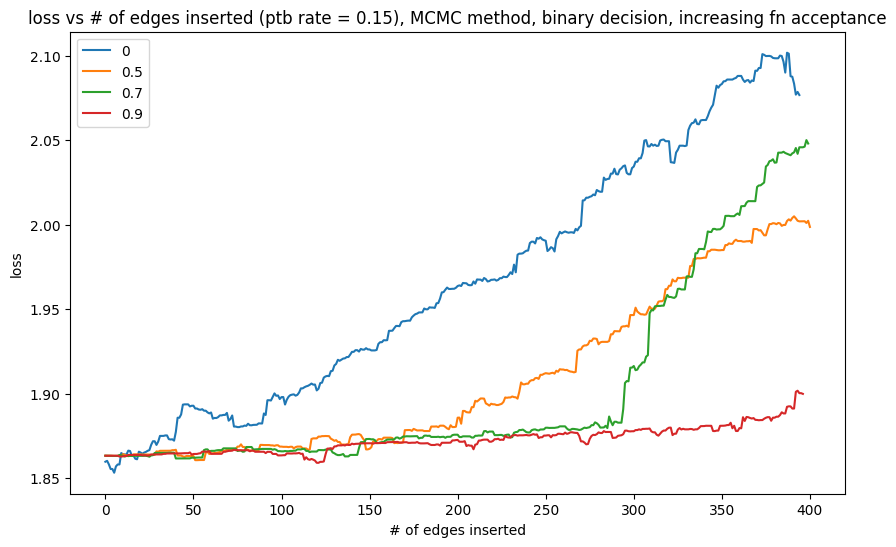

In [47]:
plt.figure(figsize=(10, 6))

# Iterate over the dictionary and plot each list
for label, values in split_dic_decreasing.items():
    plt.plot(values, label=str(label))

plt.xlabel('# of edges inserted')
plt.ylabel('loss')
plt.title('loss vs # of edges inserted (ptb rate = 0.15), MCMC method, binary decision, increasing fn acceptance')
plt.legend()

plt.show()

In [49]:
splits = [0, 0.5, 0.7, 0.9]
# splits = [0.5, 0.7, 0.9]
split_dic_decreasing_constant = defaultdict(list)

In [50]:
for s in splits:
    print(s)
    split_dic_decreasing_constant[s] = two_phase_attack_mcmc(s, decreasing_fn, constant_fn)

0
0.15


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

[1.8600938320159912, 1.859481930732727, 1.8573647737503052, 1.857792615890503, 1.857792854309082, 1.8569403886795044, 1.8579456806182861, 1.85443913936615, 1.8539671897888184, 1.8532311916351318, 1.8532111644744873, 1.8536889553070068, 1.8534003496170044, 1.8534326553344727, 1.8530478477478027, 1.8501734733581543, 1.8473825454711914, 1.8467700481414795, 1.84563148021698, 1.8455432653427124, 1.843593955039978, 1.8433234691619873, 1.8433665037155151, 1.8521544933319092, 1.8532159328460693, 1.8571380376815796, 1.85713791847229, 1.8589117527008057, 1.857853889465332, 1.8611239194869995, 1.8624322414398193, 1.8625808954238892, 1.8644847869873047, 1.8641599416732788, 1.8632670640945435, 1.863256812095642, 1.862552285194397, 1.865869402885437, 1.8636728525161743, 1.86305832862854, 1.8625688552856445, 1.864631175994873, 1.8646351099014282, 1.8646354675292969, 1.8646401166915894, 1.8630026578903198, 1.8630026578903198, 1.8630026578903198, 1.8607070446014404, 1.8607127666473389, 1.86120736598968

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.00012218952178955078
Attempt: 1, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: -0.0028041601181030273, master_dirty_delta: -0.003672480583190918
Attempt: 2, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 0.0, master_dirty_delta: 0.0003731250762939453
works, adding
Attempt: 3, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0014560222625732422, master_dirty_delta: -0.001082777976989746
Attempt: 4, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -5.352497100830078e-05, master_dirty_delta: 0.001379251480102539
works, adding
Attempt: 5, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -5.316734313964844e-05, master_dirty_delta: 0.001839756965637207
works, adding
Attempt: 6, Selected: 3
max_change: 0.018633348941802977, master_clean_delta: -4.3511390686035156e-05, master_dir

Peturbing graph...:   0%|          | 0/205 [00:00<?, ?it/s]

[1.8633348941802979, 1.8632813692092896, 1.8632817268371582, 1.8632913827896118, 1.8632878065109253, 1.863203763961792, 1.863203763961792, 1.8647754192352295, 1.868957757949829, 1.8685314655303955, 1.8688050508499146, 1.8730372190475464, 1.873073697090149, 1.873694896697998, 1.8736951351165771, 1.8736964464187622, 1.8736964464187622, 1.8736966848373413, 1.8736966848373413, 1.8765994310379028, 1.8766058683395386, 1.8766058683395386, 1.8766058683395386, 1.8771518468856812, 1.8784862756729126, 1.8789929151535034, 1.8790117502212524, 1.880083441734314, 1.8800840377807617, 1.8800840377807617, 1.8804129362106323, 1.880645990371704, 1.8806461095809937, 1.8806463479995728, 1.8807023763656616, 1.8807040452957153, 1.880698800086975, 1.8800599575042725, 1.8800383806228638, 1.8800476789474487, 1.8801171779632568, 1.8801171779632568, 1.8805418014526367, 1.8805418014526367, 1.879272699356079, 1.879653811454773, 1.8796566724777222, 1.8796664476394653, 1.8798959255218506, 1.8799022436141968, 1.8802638

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 0.0, master_dirty_delta: 0.0001628398895263672
works, adding
Attempt: 1, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0028040409088134766, master_dirty_delta: -0.0026401281356811523
Attempt: 2, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00037300586700439453
works, adding
Attempt: 3, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -0.0014560222625732422, master_dirty_delta: -0.0010339021682739258
Attempt: 4, Selected: 2
Attempt: 5, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: 3.5762786865234375e-07, master_dirty_delta: 0.0005384683609008789
works, adding
Attempt: 6, Selected: 3
max_change: 0.018633348941802977, master_clean_delta: 1.0013580322265625e-05, master_dirty_delta: 0.0012917518615722656
works, adding
Attempt: 7, Selected: 4
max_change: 0.018633348941802977, master_clean_d

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

[1.8633348941802979, 1.8633350133895874, 1.8633352518081665, 1.8633449077606201, 1.8633449077606201, 1.8632607460021973, 1.8632606267929077, 1.8674432039260864, 1.8674488067626953, 1.8674490451812744, 1.8697795867919922, 1.8708550930023193, 1.8704285621643066, 1.870509386062622, 1.870783805847168, 1.8750159740447998, 1.8750221729278564, 1.8756434917449951, 1.8756439685821533, 1.8756450414657593, 1.8756450414657593, 1.8756450414657593, 1.8756450414657593, 1.8756450414657593, 1.8751742839813232, 1.87727689743042, 1.8778228759765625, 1.879157543182373, 1.8795912265777588, 1.879684567451477, 1.8807563781738281, 1.8807570934295654, 1.8807568550109863, 1.8810856342315674, 1.8813188076019287, 1.8813188076019287, 1.8810590505599976, 1.8815724849700928, 1.8815724849700928, 1.8815727233886719, 1.8800026178359985, 1.8799841403961182, 1.8799854516983032, 1.879837989807129, 1.879837989807129, 1.880308747291565, 1.8807333707809448, 1.8794642686843872, 1.8798452615737915, 1.8798428773880005, 1.879852

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013887882232666016
works, adding
Attempt: 1, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0028041601181030273, master_dirty_delta: -0.0027025938034057617
Attempt: 2, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013887882232666016
selected prob ltf
Attempt: 3, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -5.328655242919922e-05, master_dirty_delta: 8.52346420288086e-05
removing edge
Attempt: 4, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: 9.298324584960938e-06, master_dirty_delta: 0.00014829635620117188
works, adding
Attempt: 5, Selected: 3
max_change: 0.018633348941802977, master_clean_delta: 9.417533874511719e-06, master_dirty_delta: 0.00014829635620117188
removing edge
Attempt: 6, Selected: 3
max_change: 0.018633348941802977, ma

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

[1.8633350133895874, 1.8633350133895874, 1.8633441925048828, 1.8633443117141724, 1.863353967666626, 1.863353967666626, 1.8675364255905151, 1.8675423860549927, 1.8698729276657104, 1.870948314666748, 1.870467185974121, 1.8704674243927002, 1.8705962896347046, 1.87067711353302, 1.870896816253662, 1.875128984451294, 1.8751353025436401, 1.8757563829421997, 1.8757569789886475, 1.8757576942443848, 1.8757576942443848, 1.8786605596542358, 1.878666877746582, 1.878666877746582, 1.878666877746582, 1.8792128562927246, 1.8805476427078247, 1.8810536861419678, 1.881099820137024, 1.8811005353927612, 1.8811005353927612, 1.8814291954040527, 1.8817546367645264, 1.8817553520202637, 1.8817553520202637, 1.8818117380142212, 1.8818094730377197, 1.8818097114562988, 1.881815791130066, 1.8819167613983154, 1.8813406229019165, 1.8817651271820068, 1.8804960250854492, 1.8808770179748535, 1.880881428718567, 1.88089120388031, 1.8812527656555176, 1.8814096450805664, 1.881417989730835, 1.8814387321472168, 1.88143873214721

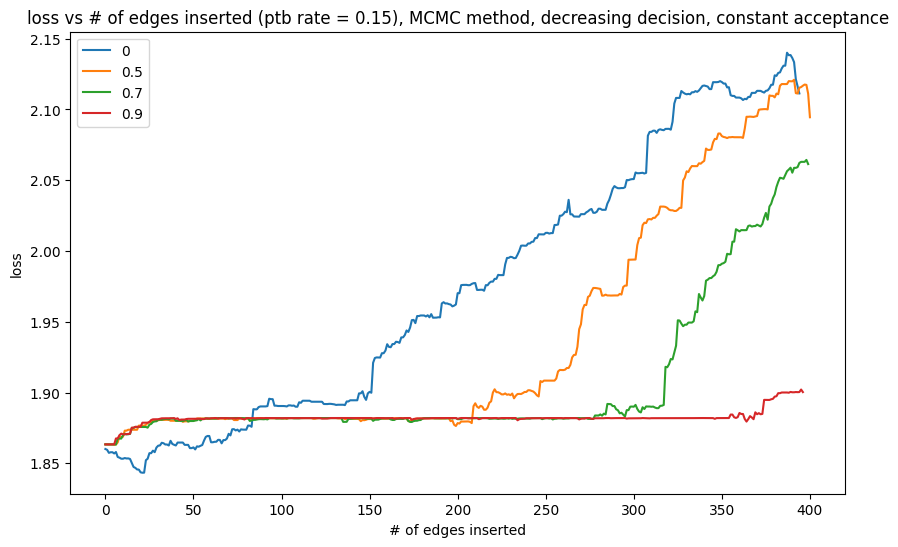

In [51]:
plt.figure(figsize=(10, 6))

# Iterate over the dictionary and plot each list
for label, values in split_dic_decreasing_constant.items():
    plt.plot(values, label=str(label))

plt.xlabel('# of edges inserted')
plt.ylabel('loss')
plt.title('loss vs # of edges inserted (ptb rate = 0.15), MCMC method, decreasing decision, constant acceptance')
plt.legend()

plt.show()

In [52]:
splits = [0, 0.5, 0.7, 0.9]
# splits = [0.5, 0.7, 0.9]
split_dic_decreasing_gradual = defaultdict(list)

In [53]:
for s in splits:
    print(s)
    split_dic_decreasing_gradual[s] = two_phase_attack_mcmc(s, decreasing_fn, increasing_fn)

0
0.15


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

[1.8600938320159912, 1.8579766750335693, 1.8545187711715698, 1.8550269603729248, 1.8519660234451294, 1.851093053817749, 1.8510807752609253, 1.8488422632217407, 1.8481197357177734, 1.8480870723724365, 1.8480658531188965, 1.8480658531188965, 1.8499590158462524, 1.8494104146957397, 1.8494104146957397, 1.8504157066345215, 1.8501381874084473, 1.8476148843765259, 1.8476625680923462, 1.8458714485168457, 1.8469765186309814, 1.8465209007263184, 1.847582221031189, 1.848048210144043, 1.8482213020324707, 1.8480048179626465, 1.847856044769287, 1.8450651168823242, 1.845061182975769, 1.8444803953170776, 1.8409603834152222, 1.8455625772476196, 1.8464030027389526, 1.8464027643203735, 1.845365285873413, 1.8443076610565186, 1.8443078994750977, 1.8456580638885498, 1.8470085859298706, 1.8469194173812866, 1.8484513759613037, 1.8478270769119263, 1.8492367267608643, 1.849095106124878, 1.8495417833328247, 1.849549412727356, 1.847314476966858, 1.8505003452301025, 1.8491864204406738, 1.8492977619171143, 1.848456

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00013911724090576172
1.1920928955078125e-07 0.0 False
works, adding
Attempt: 1, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: -0.0028041601181030273, master_dirty_delta: -0.0047032833099365234
0.0028041601181030273 9.458552762336537e-05 False
0.0028041601181030273 9.458552762336537e-05 False
Attempt: 2, Selected: 1
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0008507966995239258
1.1920928955078125e-07 9.458552762336537e-05 True
works, adding
Attempt: 3, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: -0.0014559030532836914, master_dirty_delta: -0.0005559921264648438
0.0014559030532836914 0.00018917105524673074 False
0.0014559030532836914 0.00018917105524673074 False
Attempt: 4, Selected: 2
Attempt: 5, Selected: 2
max_change: 0.018633348941802977, master_clean_delta: 3.5762

Peturbing graph...:   0%|          | 0/205 [00:00<?, ?it/s]

[1.8633350133895874, 1.8633350133895874, 1.8633352518081665, 1.8633449077606201, 1.8633449077606201, 1.863344669342041, 1.8633449077606201, 1.8629734516143799, 1.8632469177246094, 1.863253116607666, 1.8638744354248047, 1.863874912261963, 1.863874912261963, 1.863875150680542, 1.863875150680542, 1.863875150680542, 1.8638814687728882, 1.8638814687728882, 1.8638814687728882, 1.8639928102493286, 1.8644990921020508, 1.8644989728927612, 1.8645116090774536, 1.8645305633544922, 1.8645310401916504, 1.8645310401916504, 1.864859700202942, 1.8650758266448975, 1.8650758266448975, 1.8655893802642822, 1.8655911684036255, 1.8655877113342285, 1.8659919500350952, 1.8659921884536743, 1.8653532266616821, 1.8653324842453003, 1.8653428554534912, 1.8654122352600098, 1.8654124736785889, 1.8658369779586792, 1.864567756652832, 1.8649487495422363, 1.86494779586792, 1.8649576902389526, 1.8652206659317017, 1.8653775453567505, 1.8663239479064941, 1.8673827648162842, 1.8673841953277588, 1.8654783964157104, 1.86548113

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -2.384185791015625e-07
1.1920928955078125e-07 0.0 False
1.1920928955078125e-07 0.0 False
Attempt: 1, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: -0.0028040409088134766, master_dirty_delta: -0.0038625001907348633
0.0028040409088134766 0.0 False
0.0028040409088134766 0.0 False
Attempt: 2, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 0.0, master_dirty_delta: -3.2186508178710938e-06
0.0 0.0 False
0.0 0.0 False
Attempt: 3, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: -0.0014560222625732422, master_dirty_delta: -0.001407027244567871
0.0014560222625732422 0.0 False
0.0014560222625732422 0.0 False
Attempt: 4, Selected: 0
Attempt: 5, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 3.5762786865234375e-07, master_dirty_delta: 7.152557373046875e-07
3.5762786865234375e-07 0.0 False
works, adding
At

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

[1.8633352518081665, 1.8633352518081665, 1.8633352518081665, 1.8633352518081665, 1.863341212272644, 1.8629698753356934, 1.8632441759109497, 1.8632502555847168, 1.8638715744018555, 1.8638718128204346, 1.86387300491333, 1.86387300491333, 1.86387300491333, 1.86387300491333, 1.8638794422149658, 1.8638794422149658, 1.8644254207611084, 1.8645187616348267, 1.8645187616348267, 1.8645192384719849, 1.8647352457046509, 1.8647353649139404, 1.8647353649139404, 1.8647351264953613, 1.8647353649139404, 1.8647353649139404, 1.8647369146347046, 1.864725112915039, 1.8647345304489136, 1.8648039102554321, 1.8648039102554321, 1.8652287721633911, 1.863959550857544, 1.8643404245376587, 1.864569902420044, 1.8647267818450928, 1.86472487449646, 1.865783929824829, 1.8657835721969604, 1.865785002708435, 1.865797758102417, 1.865797758102417, 1.8657996654510498, 1.8658010959625244, 1.8658010959625244, 1.8658016920089722, 1.8658050298690796, 1.8658050298690796, 1.8658052682876587, 1.865934133529663, 1.8662642240524292

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -6.842613220214844e-05
1.1920928955078125e-07 0.0 False
1.1920928955078125e-07 0.0 False
Attempt: 1, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: -0.0028041601181030273, master_dirty_delta: -0.003513813018798828
0.0028041601181030273 0.0 False
0.0028041601181030273 0.0 False
Attempt: 2, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: 0.0, master_dirty_delta: -0.0004525184631347656
0.0 0.0 False
0.0 0.0 False
Attempt: 3, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: -0.0014560222625732422, master_dirty_delta: -0.0014557838439941406
0.0014560222625732422 0.0 False
0.0014560222625732422 0.0 False
Attempt: 4, Selected: 0
max_change: 0.018633348941802977, master_clean_delta: -4.470348358154297e-05, master_dirty_delta: -0.00040149688720703125
4.470348358154297e-05 0.0 False
4.470348358154297e-05 0.0 False
Attempt:

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

[1.8633352518081665, 1.863344669342041, 1.863344669342041, 1.8632606267929077, 1.8632704019546509, 1.8632763624191284, 1.8632769584655762, 1.863350749015808, 1.8634315729141235, 1.8637057542800903, 1.863712191581726, 1.8637125492095947, 1.8637131452560425, 1.863713264465332, 1.8637131452560425, 1.8637195825576782, 1.8637197017669678, 1.8637195825576782, 1.8637195825576782, 1.8642657995224, 1.8643591403961182, 1.8643593788146973, 1.8643593788146973, 1.8643593788146973, 1.8643598556518555, 1.8643598556518555, 1.8643516302108765, 1.8643516302108765, 1.8644077777862549, 1.8644051551818848, 1.8644112348556519, 1.8645081520080566, 1.8645081520080566, 1.864932894706726, 1.8636635541915894, 1.864044427871704, 1.8640468120574951, 1.8640563488006592, 1.8644182682037354, 1.8645747900009155, 1.8645789623260498, 1.8645789623260498, 1.8645803928375244, 1.864547848701477, 1.8645480871200562, 1.8645479679107666, 1.864547610282898, 1.8646172285079956, 1.8647562265396118, 1.8647568225860596, 1.864757180

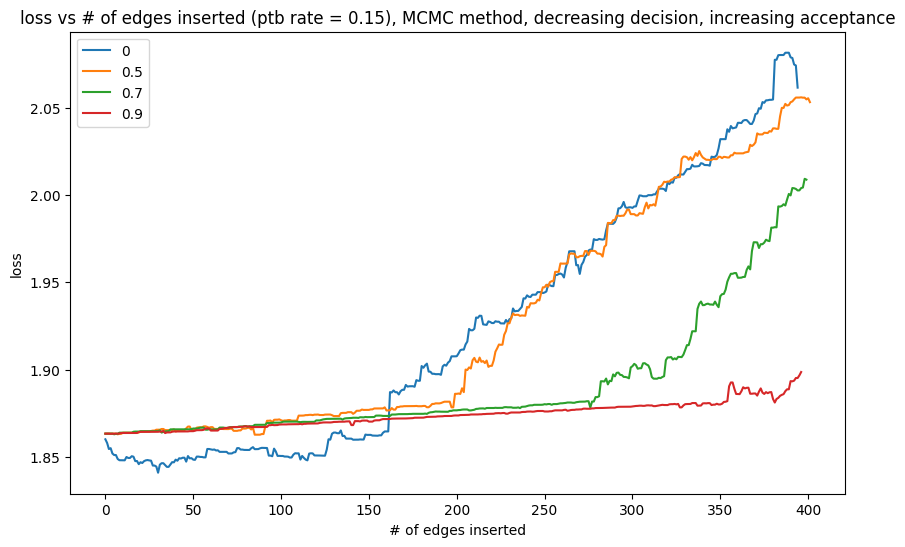

In [54]:
plt.figure(figsize=(10, 6))

# Iterate over the dictionary and plot each list
for label, values in split_dic_decreasing_gradual.items():
    plt.plot(values, label=str(label))

plt.xlabel('# of edges inserted')
plt.ylabel('loss')
plt.title('loss vs # of edges inserted (ptb rate = 0.15), MCMC method, decreasing decision, increasing acceptance')
plt.legend()

plt.show()